In [1]:
from models.KNN import KNN
from utils.LoadDataset import LoadDataset
import numpy as np
from matplotlib import pyplot as plt
#%matplotlib inline

In [2]:
N = 10
k_choices = list(range(1, 31))
k_to_accuracies = {}
k_to_average_accuracy = {}

for i in range(N):
# 10-fold cross validation
    trainingData, trainingLabel, validationData, validationLabel = LoadDataset(i, N)
    knn = KNN()
    knn.train(trainingData, trainingLabel)
    for k in k_choices:
        predictLabel = knn.predict(validationData, k=k)
        accuracy = np.mean(predictLabel == validationLabel)
        k_to_accuracies.setdefault(k, []).append(accuracy)
       
for k in sorted(k_to_accuracies):
    sum_accuracy = 0
    for accuracy in k_to_accuracies[k]:
        sum_accuracy += accuracy
    average_accuracy = sum_accuracy / N
    k_to_average_accuracy.setdefault(k, []).append(average_accuracy)
    #print('k = %d, average accuracy = %f' % (k, average_accuracy))

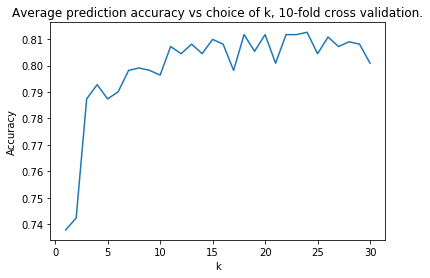

In [3]:
k_values = sorted(k_to_average_accuracy.keys())
accuracy_values = [k_to_average_accuracy[k] for k in k_values]
plt.title("Average prediction accuracy vs choice of k, 10-fold cross validation.")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.plot(k_values, accuracy_values)
plt.show()

In [4]:
best_accuracy = np.max(accuracy_values)
best_k = k_values[np.argmax(accuracy_values)]
print('k = %d, maximum average accuracy = %f' % (best_k, best_accuracy))

k = 24, maximum average accuracy = 0.812613
